# Régression linéaire

Imaginons que nous voulions récupérer l'équation d'une regression (donc continue) et pour cela, utilisons un fichier csv.
Le modèle n'est pas dans scikit-learn, nous allons le charger (https://www.kaggle.com/datasets)

## On importe les bibliothèques nécessaires
* pandas
* numpy
* matplotlib

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Récupération des informations
* Les données proviennent du site Kraggle : https://www.kaggle.com/datasets/yasserh/auto-mpg-dataset
* Voyons ce que contient le fichier

In [14]:
data = pd.read_csv('Automobile.csv')
data.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140,3449,10.5,70,usa


# Première hypothèse
* Nous pensons que le poids d'un véhicule influe sur sa consommation
* Représentons graphiquement notre hypothèse
* Confrontons les données poids (weight) et distance en miles parcourue avec 1 gallon (mpg)

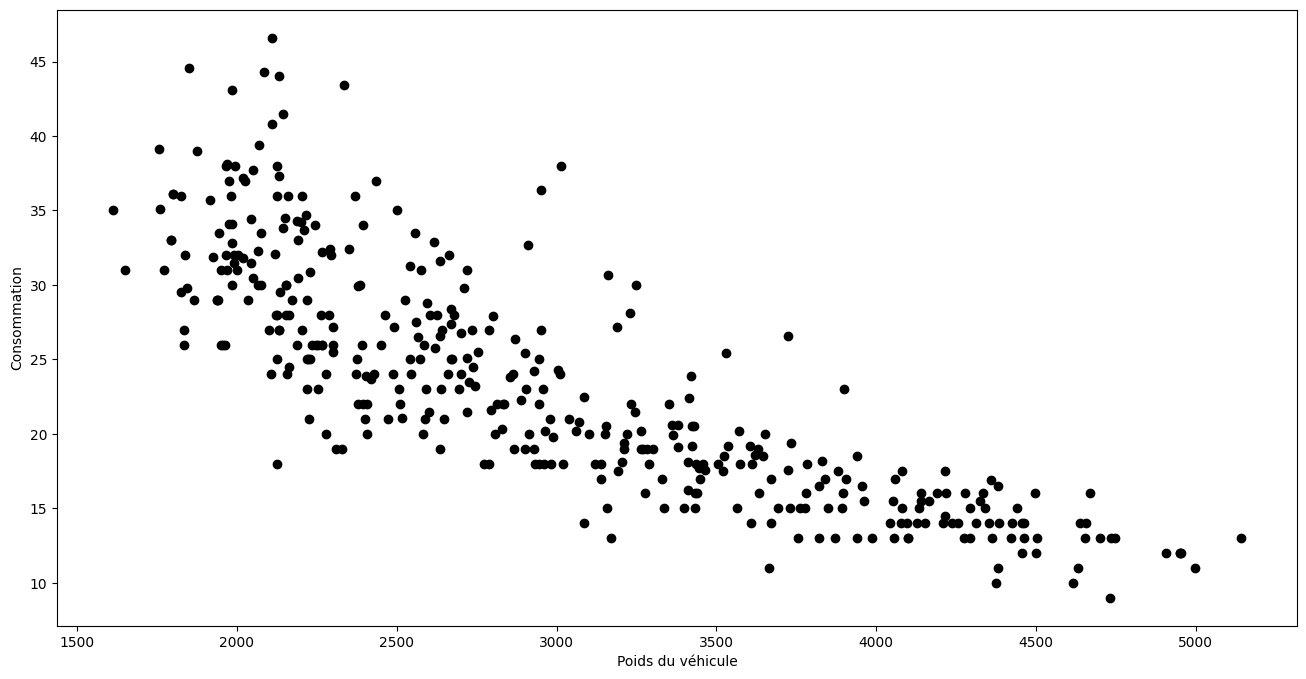

In [15]:
plt.figure(figsize=(16,8))
plt.scatter(data['weight'], data['mpg'], c='black')
plt.xlabel("Poids du véhicule")
plt.ylabel("Consommation")
plt.show()

## Notre hypothèse se confirme
* Il semble y avoir corrélation 
* Cette corrélation ne semble pas linéaire
* Voyons quand même ce que la regression linéaire peut nous apprendre
* Créons et entrainons un modèle
* Le modèle va nous donner les coefficients de la droite de régression linéaire

In [16]:
from sklearn.linear_model import LinearRegression

x = data['weight'].values.reshape(-1, 1)
y = data['mpg'].values.reshape(-1, 1)

linReg = LinearRegression()
linReg.fit(x, y)

print("L'équation de droite est donc y=", linReg.coef_[0][0], " * x + ", linReg.intercept_[0])

L'équation de droite est donc y= -0.007647342535779579  * x +  46.21652454901758


* Visualisons la droite de régression sur notre graphique

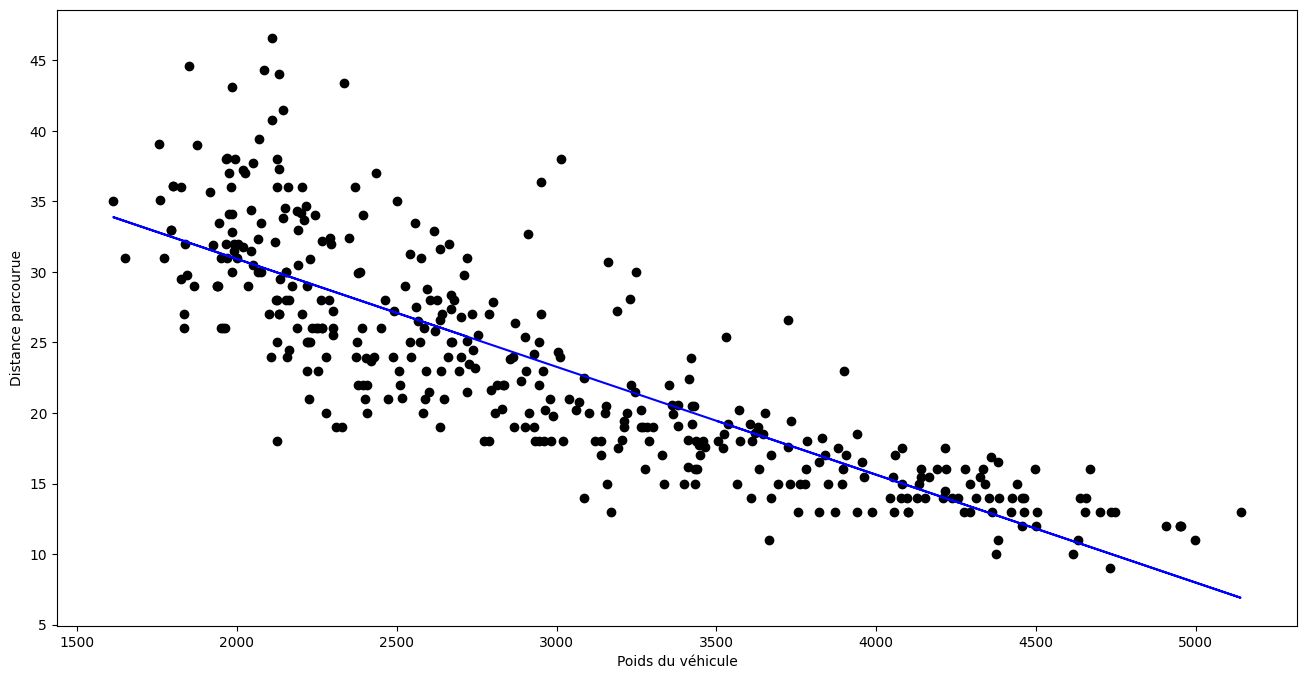

In [17]:
prediction = linReg.predict(x)
plt.figure(figsize=(16, 8))
plt.scatter(x, y, c='black')
plt.plot(x, prediction, c='blue')
plt.xlabel("Poids du véhicule")
plt.ylabel("Distance parcourue")
plt.show()

## Notre hypothèse se confirme
* Il semble y avoir corrélation 
* Cette corrélation ne semble pas linéaire
* Cette fois nous allons nous baser sur une régression polynomiale dont il faudra renseigner le degré
* reschape transforme un tableau 1D en tableau 2D, obligatoire pour avoir le paramètre sous la bonne forme
* Les données en entrée vont subir une transformation qui va nous permettre d'utiliser une regression linéaire

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=5, include_bias=False)

x = data['weight'].values.reshape(-1, 1)
y = data['mpg'].values.reshape(-1, 1)

x_poly = poly_features.fit_transform(x)

## Régression linaire
* La régression linéaire s'applique maintenant aux données transformées
* La prédiction se passe donc comme si la régression était polynomiale

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_poly, y)
x_vals = np.linspace(1000, 5500, 10000).reshape(-1, 1)
x_vals_poly = poly_features.fit_transform(x_vals)
y_vals = reg.predict(x_vals_poly)

## Visualisation
* Il ne reste plus qu'à visualiser le résultat graphiquement
* La regression polynomiale est bien plus proche de la réalité
* Modifions le degré du polynome pour voir les différentes propositions

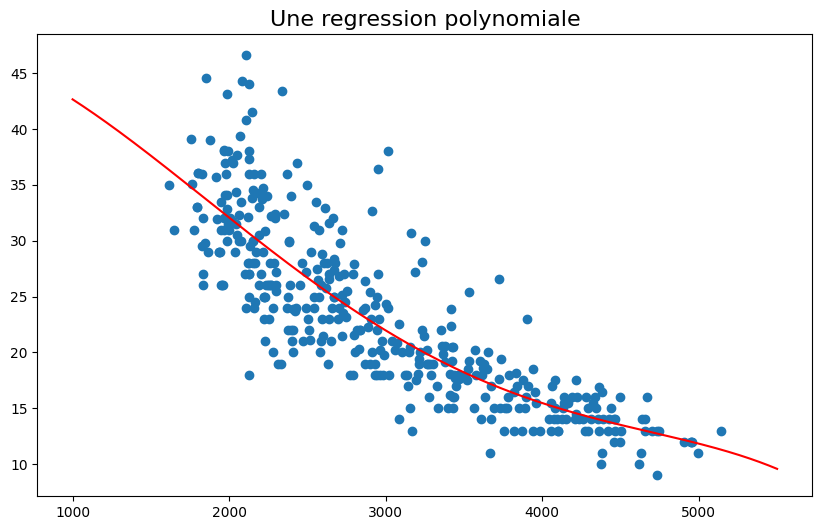

In [20]:
plt.figure(figsize=(10,6))
plt.title("Une regression polynomiale", size=16)
plt.scatter(x, y)
plt.plot(x_vals, y_vals, c="red")
plt.show()

## Equation de la courbe
* On retrouve les coefficients des puissances de x
* On retrouve la constante

In [22]:
reg.coef_
reg.intercept_

array([[-4.22915708e-09, -6.53333858e-06,  1.39562289e-09,
        -3.35142790e-14, -8.37630882e-18]])